# **Part I: Building a Basic NN**

## Step 1: Loading the Dataset and main statistics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import torch.optim as optim
import time

In [2]:
# Step 1: Loading the Dataset and main statistics
df = pd.read_csv('dataset.csv')

In [3]:
# Displaying the first few rows and dataset summary
print(df.head())
print(df.describe())
print(df.info())

  f1   f2  f3  f4   f5    f6     f7  target
0  6  148  72  35    0  33.6  0.627       1
1  1   85  66  29    0  26.6  0.351       0
2  8  183  64   0    0  23.3  0.672       1
3  1   89  66  23   94  28.1  0.167       0
4  0  137  40  35  168  43.1  2.288       1
               f3      target
count  766.000000  766.000000
mean    69.118799    0.349869
std     19.376901    0.477240
min      0.000000    0.000000
25%     62.500000    0.000000
50%     72.000000    0.000000
75%     80.000000    1.000000
max    122.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dt

In [4]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64


In [5]:
# Displaying total missing values across the dataset
total_missing = missing_values.sum()
print(f"\nTotal missing values in the dataset: {total_missing}")


Total missing values in the dataset: 0


In [6]:
# Checking for invalid character entries in each column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'f1': ['6' '1' '8' '0' '5' '3' '10' '2' '4' '7' '9' '11' '13' '15' '17' '12'
 '14' 'c']
Unique values in 'f2': ['148' '85' '183' '89' '137' '116' '78' '115' '197' '125' '110' '168'
 '139' '189' '166' '100' '118' '107' '103' '126' '99' '196' '119' '143'
 '147' '97' '145' '117' '109' '158' '88' '92' '122' '138' '102' '90' '111'
 '180' '133' '106' '171' '159' '146' '71' '105' '101' '176' '150' '73'
 '187' '84' '44' '141' '114' '95' '129' '79' '0' '62' '131' '112' '113'
 '74' '83' '136' '80' '123' '81' '134' '142' '144' '93' '163' '151' '96'
 '155' '76' '160' '124' '162' '132' '120' '173' '170' '128' '108' '154'
 '57' '156' '153' '188' '152' '104' '87' '75' '179' '130' '194' '181'
 '135' '184' '140' '177' '164' '91' '165' '86' '193' '191' '161' '167'
 '77' '182' '157' '178' '61' '98' '127' '82' '72' '172' '94' '175' '195'
 '68' '186' '198' '121' '67' '174' '199' '56' '169' '149' '65' '190' 'f']
Unique values in 'f3': [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30

In [7]:
# Replacing invalid characters ('c', 'f', 'a', 'b', 'd', 'e') with NaN
df.replace(['c', 'f', 'a', 'b', 'd', 'e'], pd.NA, inplace=True)

# checking again if any invalid values still exist
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Updated unique values in '{col}' after replacement: {unique_values}")

Updated unique values in 'f1' after replacement: ['6' '1' '8' '0' '5' '3' '10' '2' '4' '7' '9' '11' '13' '15' '17' '12'
 '14' <NA>]
Updated unique values in 'f2' after replacement: ['148' '85' '183' '89' '137' '116' '78' '115' '197' '125' '110' '168'
 '139' '189' '166' '100' '118' '107' '103' '126' '99' '196' '119' '143'
 '147' '97' '145' '117' '109' '158' '88' '92' '122' '138' '102' '90' '111'
 '180' '133' '106' '171' '159' '146' '71' '105' '101' '176' '150' '73'
 '187' '84' '44' '141' '114' '95' '129' '79' '0' '62' '131' '112' '113'
 '74' '83' '136' '80' '123' '81' '134' '142' '144' '93' '163' '151' '96'
 '155' '76' '160' '124' '162' '132' '120' '173' '170' '128' '108' '154'
 '57' '156' '153' '188' '152' '104' '87' '75' '179' '130' '194' '181'
 '135' '184' '140' '177' '164' '91' '165' '86' '193' '191' '161' '167'
 '77' '182' '157' '178' '61' '98' '127' '82' '72' '172' '94' '175' '195'
 '68' '186' '198' '121' '67' '174' '199' '56' '169' '149' '65' '190' <NA>]
Updated unique values in 

In [8]:
# dropping rows with missing values (or handle them as needed)
df.dropna(inplace=True)

In [9]:
# reconfirming there are no remaining invalid characters or missing values
print(f"Remaining missing values: {df.isnull().sum().sum()}")


Remaining missing values: 0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      760 non-null    object
 1   f2      760 non-null    object
 2   f3      760 non-null    int64 
 3   f4      760 non-null    object
 4   f5      760 non-null    object
 5   f6      760 non-null    object
 6   f7      760 non-null    object
 7   target  760 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 53.4+ KB


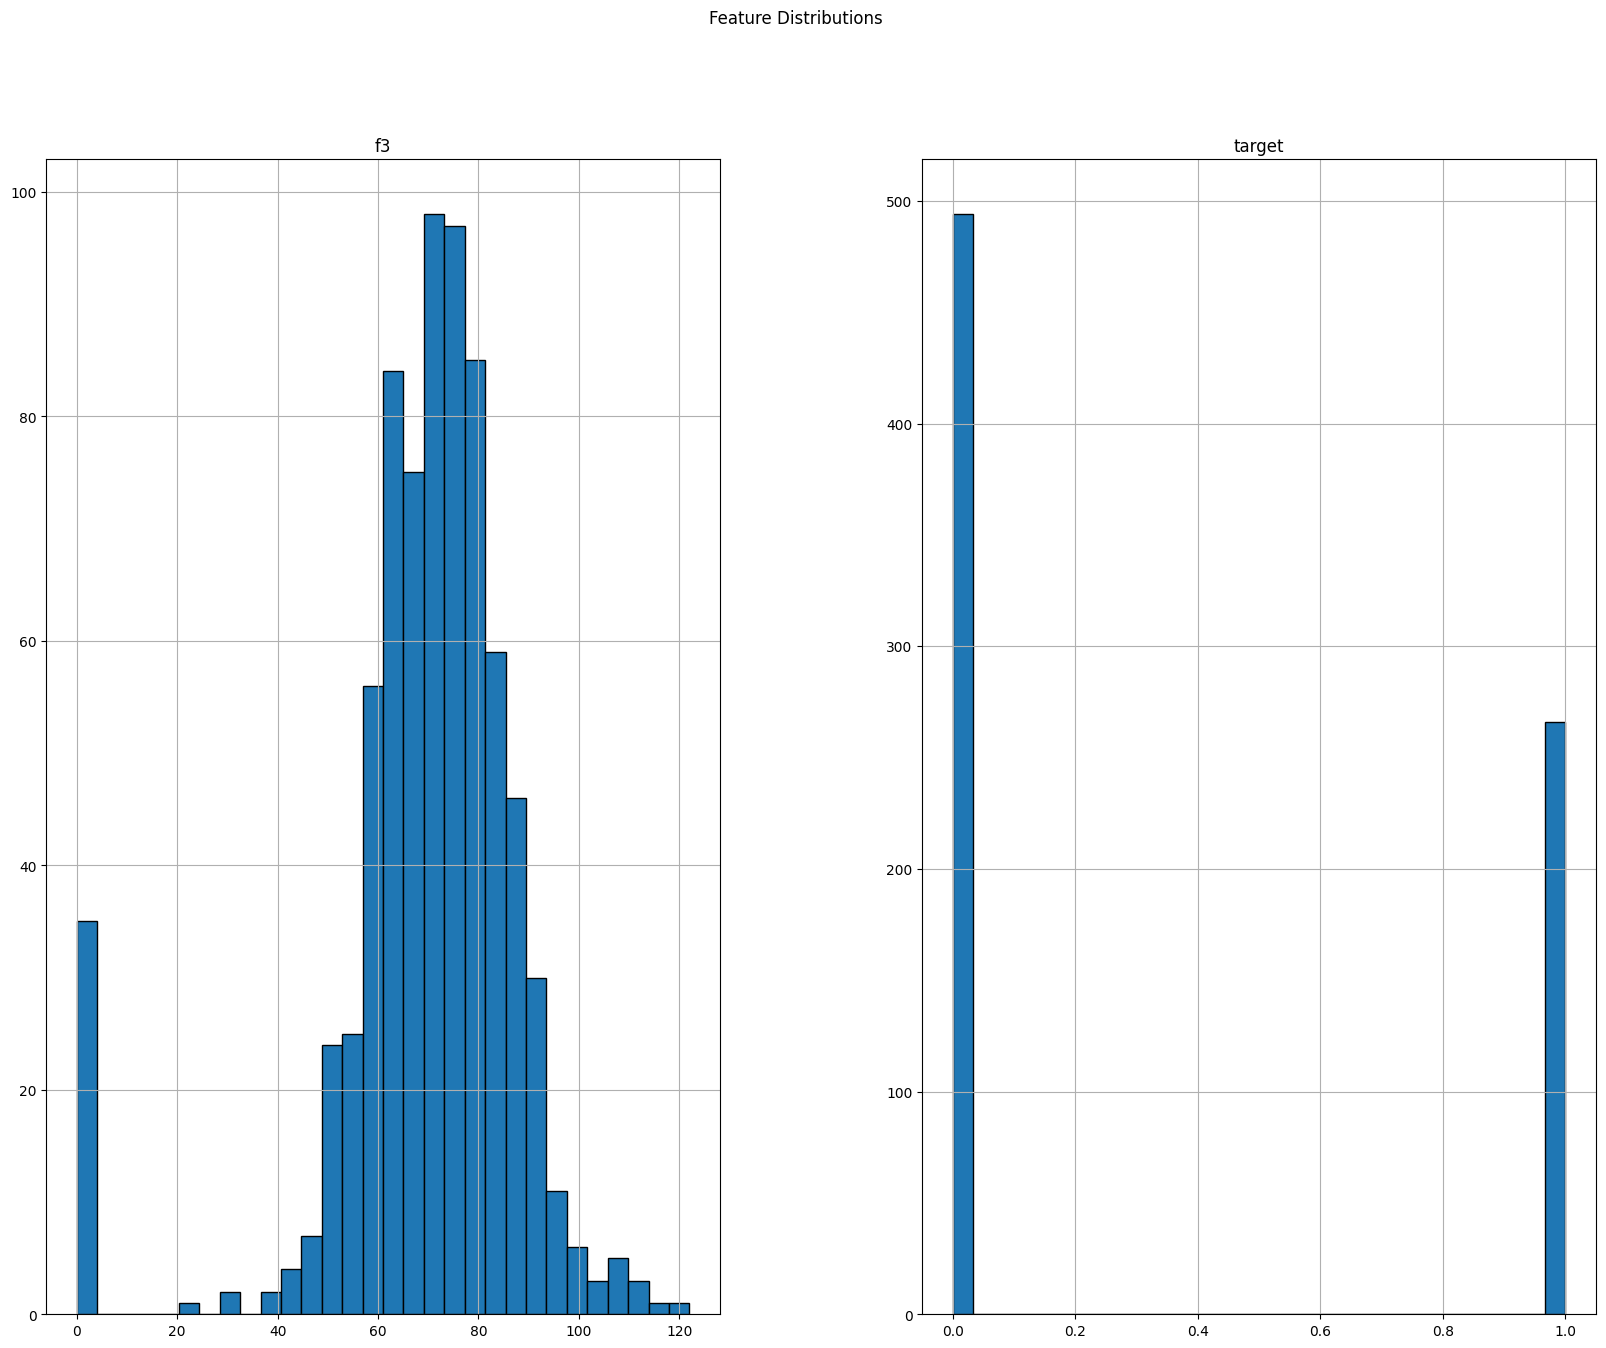

In [11]:
# Plot histograms for each feature in the dataset
df.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


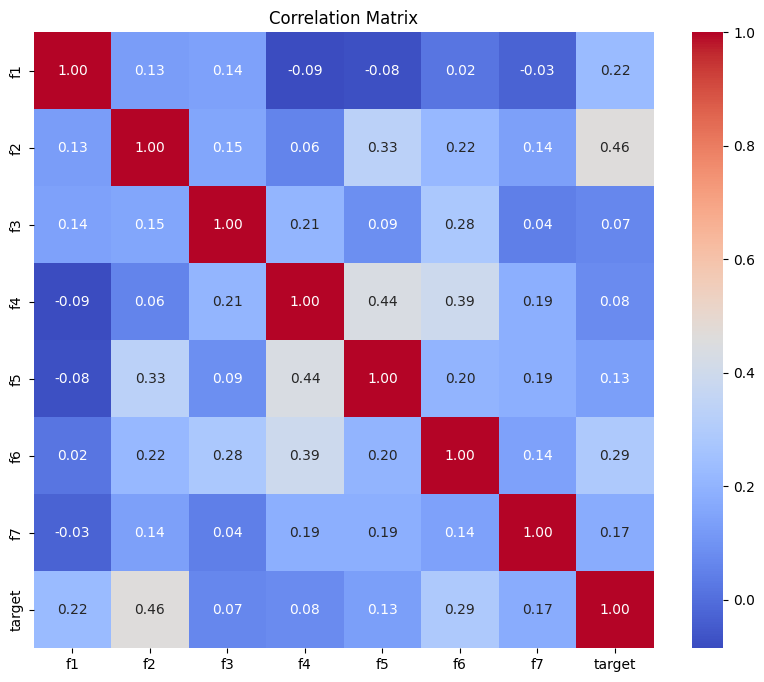

In [12]:
# Generate a correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

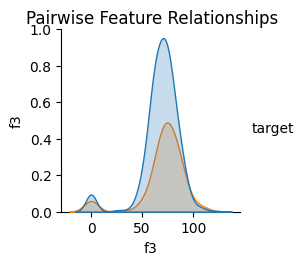

In [13]:
# Pairplot to show relationships between features
sns.pairplot(df, hue='target')  # Adjust 'target' based on your dataset's target column
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

## Step 2: Preprocessing and Splitting the Dataset



In [14]:
# Convert the object columns to numeric
df['f1'] = pd.to_numeric(df['f1'], errors='coerce')
df['f2'] = pd.to_numeric(df['f2'], errors='coerce')
df['f4'] = pd.to_numeric(df['f4'], errors='coerce')
df['f5'] = pd.to_numeric(df['f5'], errors='coerce')
df['f6'] = pd.to_numeric(df['f6'], errors='coerce')
df['f7'] = pd.to_numeric(df['f7'], errors='coerce')

# Drop rows with NaN values resulting from conversion issues
df.dropna(inplace=True)



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      760 non-null    int64  
 1   f2      760 non-null    int64  
 2   f3      760 non-null    int64  
 3   f4      760 non-null    int64  
 4   f5      760 non-null    int64  
 5   f6      760 non-null    float64
 6   f7      760 non-null    float64
 7   target  760 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 53.4 KB


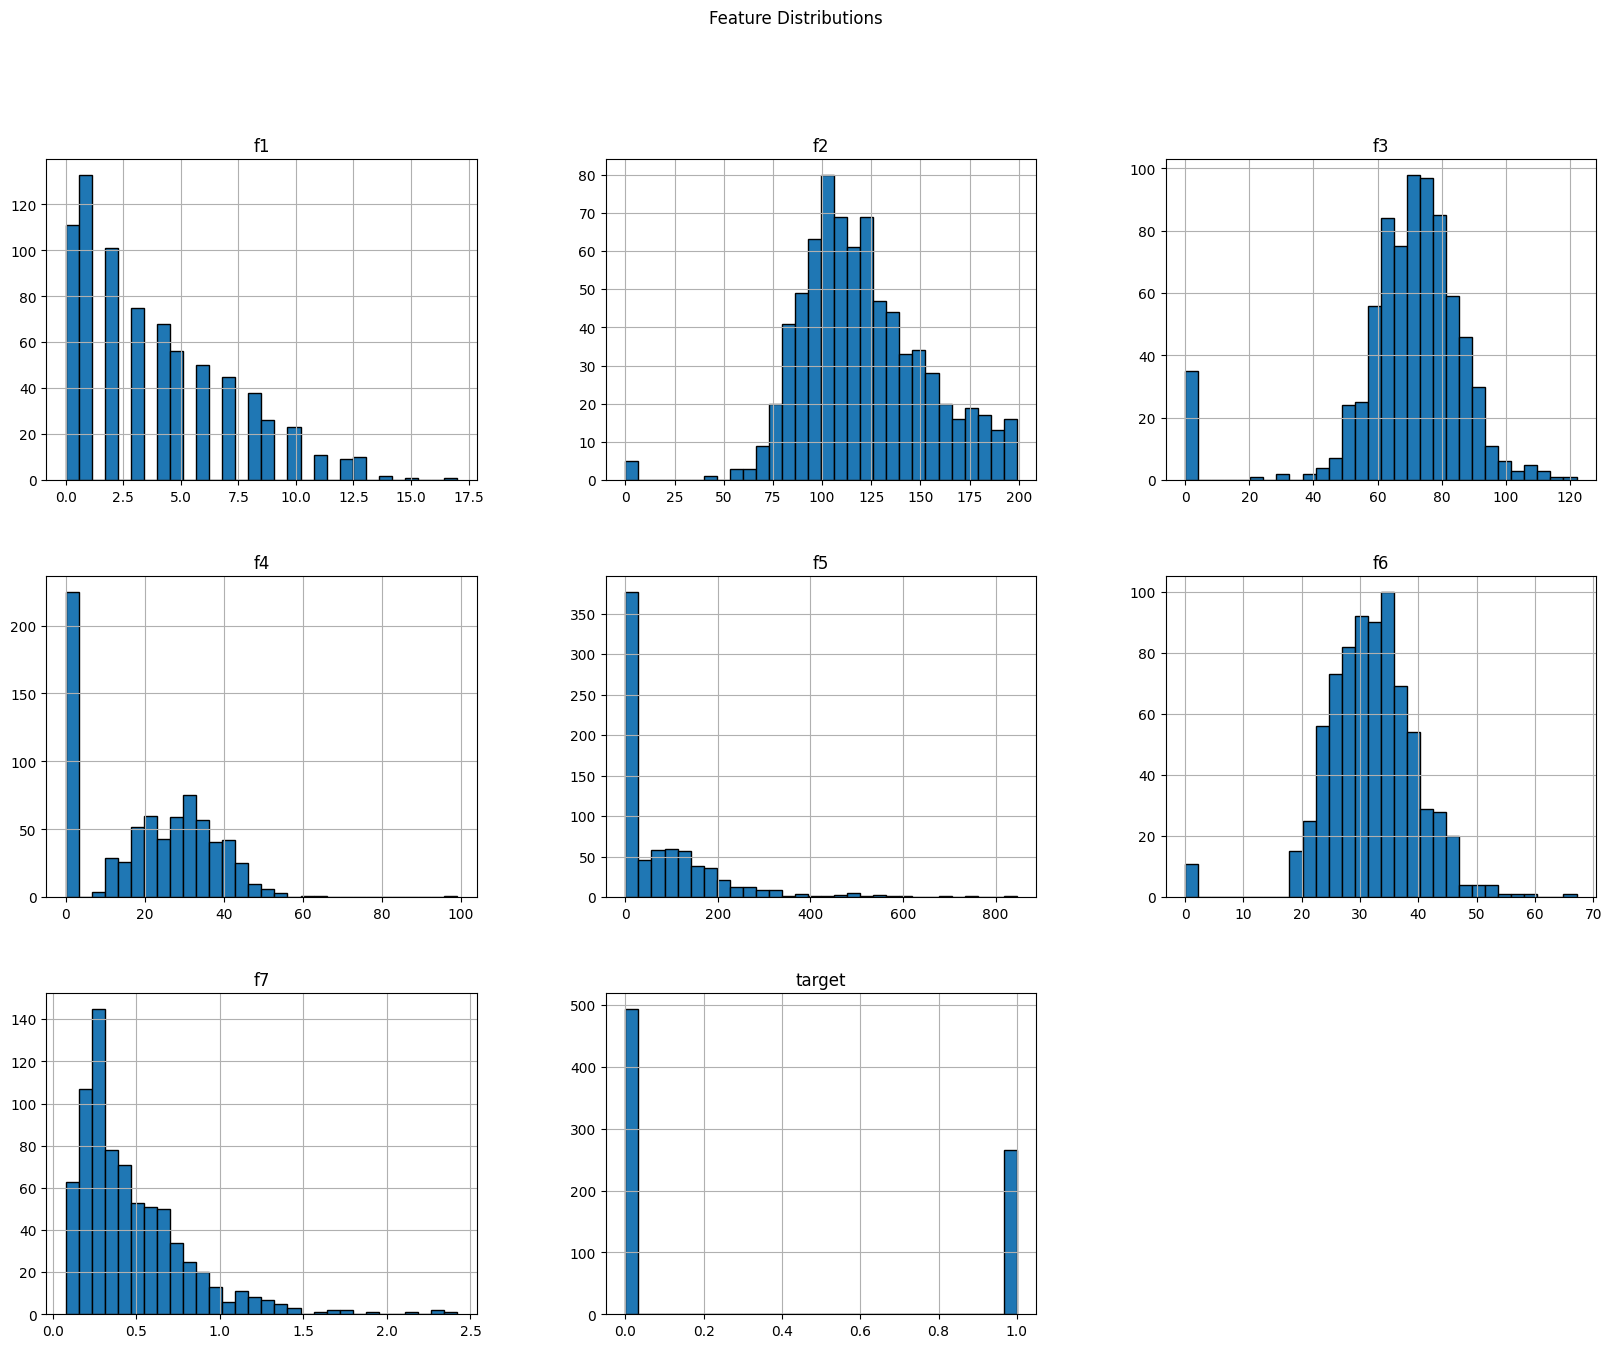

In [16]:
# Plot histograms for each feature in the dataset
df.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


In [17]:
# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=56)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=56)  # 10% validation

# Show some information about the split
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (532, 7)
Validation set size: (76, 7)
Test set size: (152, 7)


In [18]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Print the shape of the tensors
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_val_tensor shape: {X_val_tensor.shape}")
print(f"y_val_tensor shape: {y_val_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")

X_train_tensor shape: torch.Size([532, 7])
y_train_tensor shape: torch.Size([532, 1])
X_val_tensor shape: torch.Size([76, 7])
y_val_tensor shape: torch.Size([76, 1])
X_test_tensor shape: torch.Size([152, 7])
y_test_tensor shape: torch.Size([152, 1])


## Step 3: Defining the Neural Network



1. Deciding the NN Architecture
Based on the guidelines:

2. Input neurons: The number of input neurons is equal to the number of features, which in your case is 7.

3. Output neurons: This will depend on the type of classification (binary or multi-class). Since it seems like you are working on a binary classification problem, we will have 1 output neuron.

4. Activation functions:
For hidden layers, we can use ReLU (Rectified Linear Unit), which is commonly used due to its efficiency.
For the output layer in binary classification, Sigmoid is typically used to map the output between 0 and 1.
Number of hidden layers: We can start with 2 hidden layers.

5. Size of each hidden layer: Let's use 64 neurons for each hidden layer as a starting point.

6. Dropout: Including Dropout helps in preventing overfitting. We can use a dropout layer with a dropout probability of 0.5.

In [19]:
# Step 3: Defining the Neural Network
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(7, 64)  # Input layer with 7 neurons (features), 64 neurons in the first hidden layer
        self.fc2 = nn.Linear(64, 64)  # Second hidden layer with 64 neurons
        self.output = nn.Linear(64, 1)  # Output layer with 1 neuron for binary classification
        self.dropout = nn.Dropout(0.5)  # Dropout layer to prevent overfitting

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after the first layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout after the second layer
        x = torch.sigmoid(self.output(x))  # Sigmoid output for binary classification
        return x

# Initialize the model
model = NeuralNetwork()

# Print the model summary
print(model)


NeuralNetwork(
  (fc1): Linear(in_features=7, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


Explanation of the Code:
1. Input Layer: Takes 7 input features (the number of columns in your dataset excluding the target).
2. Hidden Layers: Two fully connected layers with 64 neurons each. The ReLU activation function is applied after each layer to introduce non-linearity.
3. Dropout: Applied after each hidden layer with a probability of 0.5 to prevent overfitting.
4. Output Layer: The final layer uses Sigmoid activation for binary classification, outputting a probability between 0 and 1.


model summary explanation

Layers in the Neural Network:

1. Input Layer (fc1):

Linear Layer with 7 input features and 64 output features (neurons).

This means that the input data with 7 features is being passed through 64 neurons in the first hidden layer.

2.First Hidden Layer (fc2):

Linear Layer with 64 input features (from the previous layer) and 64 output features.

The output of the first hidden layer, which consists of 64 neurons, is passed through another layer with 64 neurons.

3. Output Layer (output):

Linear Layer with 64 input features (from the second hidden layer) and 1 output feature.

This is the final output layer used for binary classification, where the single output neuron will produce a probability between 0 and 1 (since a sigmoid function will be applied).

3. Dropout Layer (dropout):

A Dropout layer is used with a dropout probability (p=0.5), meaning 50% of the neurons will randomly be "dropped out" during each forward pass in the hidden layers to prevent overfitting.

What Does This Tell Us?

The architecture of the network is well-balanced with two hidden layers, each having 64 neurons. This is a fairly typical architecture for binary classification problems.

Dropout has been included, which will help in reducing overfitting by randomly turning off neurons during training, allowing the model to generalize better to unseen data.

The output layer has just 1 neuron, which is appropriate for binary classification, as the output will represent the probability of one of the classes.

## step 4 training the neural network

In [20]:
import torch.optim as optim

In [21]:
# Step 4: Training the Neural Network
loss_function = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

In [22]:
# Training loop with time tracking, and tracking of train, validation, and test accuracies
def train_model_with_test_accuracy(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, X_test_tensor, y_test_tensor, epochs=30, batch_size=32):
    model.train()  # Set the model to training mode
    train_losses = []
    val_losses = []
    test_losses = []
    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    start_time = time.time()

    for epoch in range(epochs):
        permutation = torch.randperm(X_train_tensor.size()[0])  # Shuffle the dataset for each epoch
        epoch_loss = 0
        correct_train = 0
        total_train = 0

        for i in range(0, X_train_tensor.size()[0], batch_size):
            indices = permutation[i:i + batch_size]
            batch_X, batch_y = X_train_tensor[indices], y_train_tensor[indices]

            outputs = model(batch_X)
            loss = loss_function(outputs, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            predicted_train = torch.round(outputs)
            correct_train += (predicted_train == batch_y).sum().item()
            total_train += batch_y.size(0)

        avg_train_loss = epoch_loss / len(X_train_tensor)
        train_losses.append(avg_train_loss)

        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        model.eval()
        correct_val = 0
        total_val = y_val_tensor.size(0)
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = loss_function(val_outputs, y_val_tensor).item()
            val_losses.append(val_loss)

            predicted_val = torch.round(val_outputs)
            correct_val = (predicted_val == y_val_tensor).sum().item()
            val_accuracy = correct_val / total_val
            val_accuracies.append(val_accuracy)

        correct_test = 0
        total_test = y_test_tensor.size(0)
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = loss_function(test_outputs, y_test_tensor).item()
            test_losses.append(test_loss)

            predicted_test = torch.round(test_outputs)
            correct_test = (predicted_test == y_test_tensor).sum().item()
            test_accuracy = correct_test / total_test
            test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss:.4f}, "
              f"Test Loss: {test_loss:.4f}, Training Accuracy: {train_accuracy * 100:.2f}%, "
              f"Validation Accuracy: {val_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%")

    end_time = time.time()
    total_time = end_time - start_time

    print(f"Training completed in {total_time:.2f} seconds")
    return train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies, total_time

# Set epochs and batch size
epochs = 30
batch_size = 32

# Train the model and get losses and accuracies
train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies, total_time = train_model_with_test_accuracy(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, X_test_tensor, y_test_tensor, epochs=epochs, batch_size=batch_size)


Epoch 1/30, Training Loss: 0.0214, Validation Loss: 0.6391, Test Loss: 0.6264, Training Accuracy: 55.64%, Validation Accuracy: 75.00%, Test Accuracy: 69.08%
Epoch 2/30, Training Loss: 0.0196, Validation Loss: 0.6011, Test Loss: 0.5680, Training Accuracy: 69.17%, Validation Accuracy: 72.37%, Test Accuracy: 73.03%
Epoch 3/30, Training Loss: 0.0183, Validation Loss: 0.5700, Test Loss: 0.5187, Training Accuracy: 71.05%, Validation Accuracy: 69.74%, Test Accuracy: 78.29%
Epoch 4/30, Training Loss: 0.0173, Validation Loss: 0.5408, Test Loss: 0.4828, Training Accuracy: 75.19%, Validation Accuracy: 69.74%, Test Accuracy: 80.92%
Epoch 5/30, Training Loss: 0.0165, Validation Loss: 0.5243, Test Loss: 0.4513, Training Accuracy: 76.88%, Validation Accuracy: 72.37%, Test Accuracy: 81.58%
Epoch 6/30, Training Loss: 0.0162, Validation Loss: 0.5170, Test Loss: 0.4324, Training Accuracy: 75.94%, Validation Accuracy: 72.37%, Test Accuracy: 82.24%
Epoch 7/30, Training Loss: 0.0156, Validation Loss: 0.5086

In [23]:
# Saving the model's weights
torch.save(model.state_dict(), 'best_model_weights.pth')
print("Model weights saved successfully.")


Model weights saved successfully.


In [24]:
# Loading the saved model weights
model.load_state_dict(torch.load('best_model_weights.pth'))
model.eval()  # Ensure the model is set to evaluation mode
print("Model weights loaded successfully.")


Model weights loaded successfully.


<ipython-input-24-d405d3099989>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_weights.pth'))


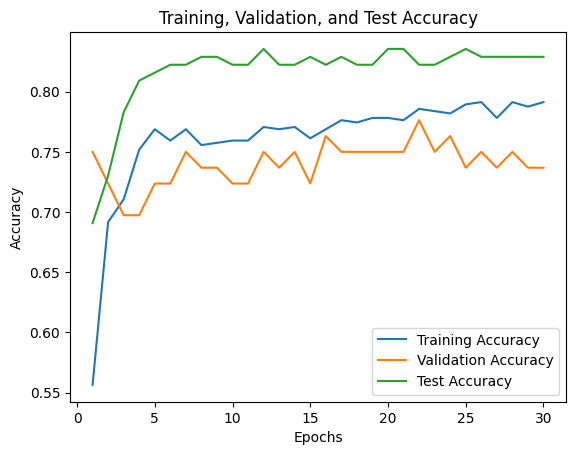

In [25]:
# Step 5: Visualization of Training, Validation, and Test Accuracy

# Plot training, validation, and test accuracy
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


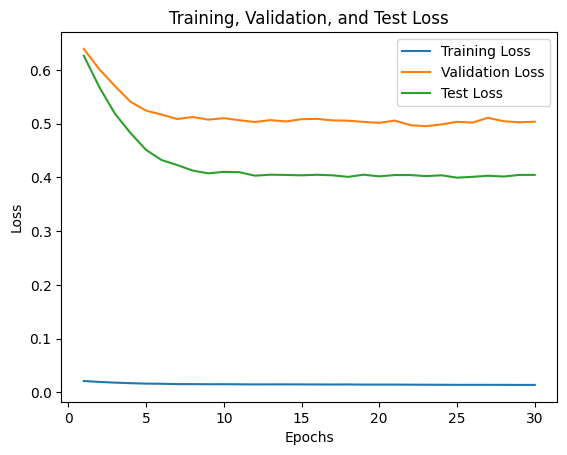

In [26]:
# Step 6: Visualization of Loss

# Plot training, validation, and test loss
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

In [27]:
# Step 7: Evaluating the Model on Test Data

# Function to evaluate the model on the test data
def evaluate_model(model, X_test_tensor, y_test_tensor):
    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():  # No gradients needed for testing
        test_outputs = model(X_test_tensor)

        # Convert sigmoid outputs to 0 or 1
        predicted_labels = torch.round(test_outputs)

        # Calculate accuracy
        accuracy = (predicted_labels == y_test_tensor).sum().item() / len(y_test_tensor)
        print(f"Test Accuracy: {accuracy * 100:.2f}%")

        # Convert tensors to numpy arrays for precision, recall, and F1 score calculation
        y_true = y_test_tensor.numpy()
        y_pred = predicted_labels.numpy()

        # Calculate precision, recall, and F1 score
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

# Evaluate the model on the test set
evaluate_model(model, X_test_tensor, y_test_tensor)

Test Accuracy: 82.89%
Precision: 0.73, Recall: 0.70, F1 Score: 0.71


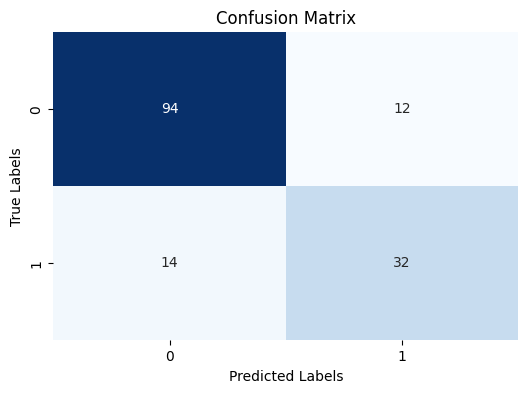

In [28]:
# Step 8: Confusion Matrix

# Compute confusion matrix
y_true = y_test_tensor.numpy()
y_pred = torch.round(model(X_test_tensor)).detach().numpy()

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


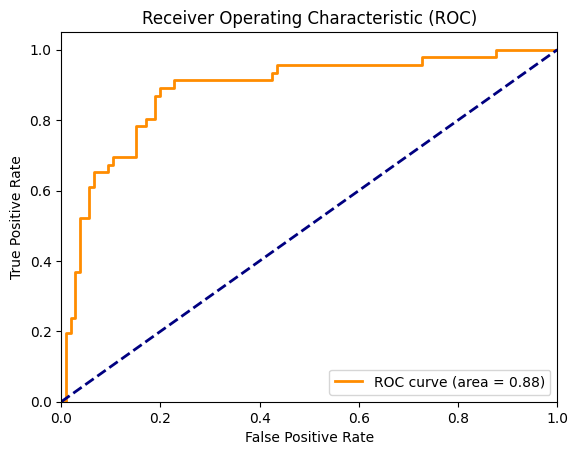

In [29]:
# Step 9: ROC Curve and AUC Score

# Get the raw outputs from the model (before rounding)
with torch.no_grad():
    test_outputs = model(X_test_tensor)

# Convert tensors to numpy for ROC curve calculation
y_test_np = y_test_tensor.numpy()
test_outputs_np = test_outputs.numpy()

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_np, test_outputs_np)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#**Part2**

#Step 1

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

class NeuralNetwork(nn.Module):
    def __init__(self, dropout_rate):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(7, 128)  # Increased number of neurons
        self.bn1 = nn.BatchNorm1d(128)  # Batch normalization
        self.layer2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)  # Batch normalization
        self.output_layer = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(dropout_rate)  # Modify dropout rate here

    def forward(self, x):
        x = self.relu(self.bn1(self.layer1(x)))
        x = self.dropout(x)  # Apply dropout after the first hidden layer
        x = self.relu(self.bn2(self.layer2(x)))
        x = self.dropout(x)  # Apply dropout after the second hidden layer
        x = self.sigmoid(self.output_layer(x))
        return x



# Initialize the model with different dropout rates and hypertuned parameters
dropout_rates = [0.0, 0.2, 0.3]
learning_rate = 0.001  # Lower learning rate
batch_size = 16  # Small batch size for faster updates
num_epochs = 1000  # Increased epochs for better training
patience = 5  # Early stopping patience
results = []  # Store results

# Training loop with hypertuned parameters
for idx, rate in enumerate(dropout_rates):
    print(f"Training Setup #{idx+1} with Dropout rate: {rate}")
    model = NeuralNetwork(dropout_rate=rate)

    # Loss function and optimizer
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5, verbose=True)  # Learning rate scheduler

    best_accuracy = 0
    early_stopping_counter = 0

    # Batch processing
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        permutation = torch.randperm(X_train_tensor.size()[0])

        for i in range(0, X_train_tensor.size()[0], batch_size):
            indices = permutation[i:i + batch_size]
            batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

            optimizer.zero_grad()  # Zero the gradients
            outputs = model(batch_x)  # Forward pass
            loss = criterion(outputs, batch_y)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update parameters

        # Calculate accuracy on training set after each epoch
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            predictions = model(X_train_tensor).round()  # Round to 0 or 1
            accuracy = accuracy_score(y_train_tensor, predictions)

        # Check for early stopping
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1

        if early_stopping_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

        # Step the learning rate scheduler
        scheduler.step(loss)

    results.append((f"Setup #{idx+1}", rate, best_accuracy))

# Display results in the requested format
print("\nDropout Rate Tuning")
print("Value     Test Accuracy")
for setup, rate, accuracy in results:
    print(f"{setup}   {accuracy:.4f}")


Training Setup #1 with Dropout rate: 0.0


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Early stopping at epoch 26
Training Setup #2 with Dropout rate: 0.2


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Early stopping at epoch 34
Training Setup #3 with Dropout rate: 0.3


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Early stopping at epoch 19

Dropout Rate Tuning
Value     Test Accuracy
Setup #1   0.8139
Setup #2   0.7951
Setup #3   0.7838


#Step 2

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Define Neural Network with tunable layers and dropout rate
class NeuralNetworkTuningLayers(nn.Module):
    def __init__(self, num_layers, dropout_rate):
        super(NeuralNetworkTuningLayers, self).__init__()
        self.layers = nn.ModuleList([nn.Linear(7, 256)] +
                                    [nn.Linear(256, 256) for _ in range(num_layers - 1)])
        self.output_layer = nn.Linear(256, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        for layer in self.layers:
            x = self.relu(layer(x))
            x = self.dropout(x)
        x = self.sigmoid(self.output_layer(x))
        return x



# Define initialization method
def initialize_weights(model, init_type):
    if init_type == 'xavier':
        for layer in model.modules():
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
    elif init_type == 'kaiming':
        for layer in model.modules():
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')

# Training function
def train_model(model, learning_rate, batch_size, num_epochs=40, weight_decay=1e-5):
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        permutation = torch.randperm(X_train_tensor.size()[0])

        for i in range(0, X_train_tensor.size()[0], batch_size):
            indices = permutation[i:i + batch_size]
            batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

            optimizer.zero_grad()  # Zero the gradients
            outputs = model(batch_x)  # Forward pass
            loss = criterion(outputs, batch_y)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update parameters

    # Calculate final accuracy after training
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        predictions = model(X_train_tensor).round()  # Round to 0 or 1
        accuracy = accuracy_score(y_train_tensor, predictions)
    return accuracy

# 1. Initialization Tuning
print("\nInitialization Tuning")
initializations = ['default', 'xavier', 'kaiming']
init_results = []
for idx, init_type in enumerate(initializations):
    model = NeuralNetworkTuningLayers(num_layers=2, dropout_rate=0.3)  # Use 2 layers as base model
    if init_type != 'default':
        initialize_weights(model, init_type)
    accuracy = train_model(model, learning_rate=0.0005, batch_size=16)  # Lower learning rate
    init_results.append((f"Setup #{idx+1}", init_type, accuracy))

# Display results for initialization tuning
print("\nInitialization Tuning")
print("Value     Test Accuracy")
for setup, init_type, accuracy in init_results:
    print(f"{setup}   {accuracy:.4f}")


# 2. Batch Size Tuning
print("\nBatch Size Tuning")
batch_sizes = [16, 32, 64]
batch_results = []
for idx, batch_size in enumerate(batch_sizes):
    model = NeuralNetworkTuningLayers(num_layers=2, dropout_rate=0.3)  # Use 2 layers as base model
    accuracy = train_model(model, learning_rate=0.0005, batch_size=batch_size)  # Lower learning rate
    batch_results.append((f"Setup #{idx+1}", batch_size, accuracy))

# Display results for batch size tuning
print("\nBatch Size Tuning")
print("Value     Test Accuracy")
for setup, batch_size, accuracy in batch_results:
    print(f"{setup}   {accuracy:.4f}")


# 3. Number of Layers Tuning
print("\nNumber of Layers Tuning")
num_layers_options = [2, 3, 4]
layer_results = []
for idx, num_layers in enumerate(num_layers_options):
    model = NeuralNetworkTuningLayers(num_layers=num_layers, dropout_rate=0.3)  # Base dropout rate
    accuracy = train_model(model, learning_rate=0.0005, batch_size=16)  # Lower learning rate
    layer_results.append((f"Setup #{idx+1}", num_layers, accuracy))

# Display results for number of layers tuning
print("\nNumber of Layers Tuning")
print("Value     Test Accuracy")
for setup, num_layers, accuracy in layer_results:
    print(f"{setup}   {accuracy:.4f}")



Initialization Tuning

Initialization Tuning
Value     Test Accuracy
Setup #1   0.8102
Setup #2   0.7951
Setup #3   0.8252

Batch Size Tuning

Batch Size Tuning
Value     Test Accuracy
Setup #1   0.8064
Setup #2   0.7970
Setup #3   0.7876

Number of Layers Tuning

Number of Layers Tuning
Value     Test Accuracy
Setup #1   0.8139
Setup #2   0.8214
Setup #3   0.8233


#Step 3

Initialization: Kaiming

Batch Size: 16

Number of Layers: 4

#Step 4

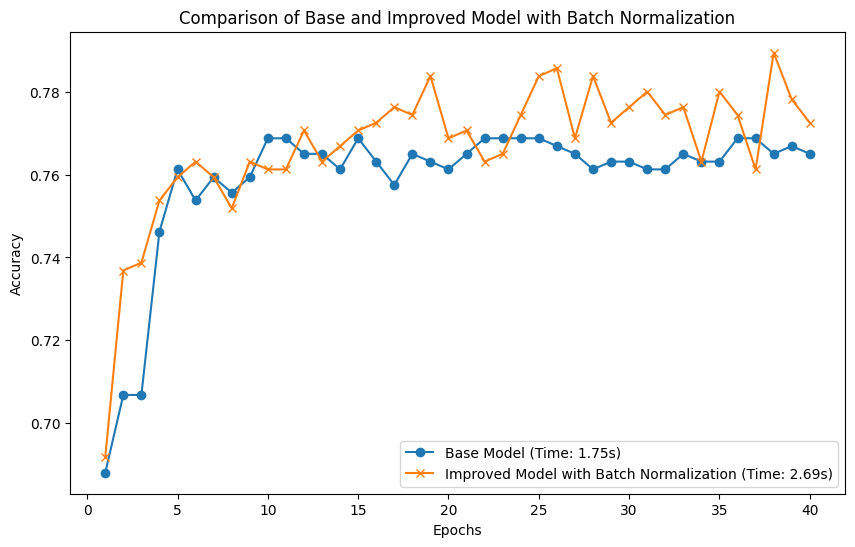

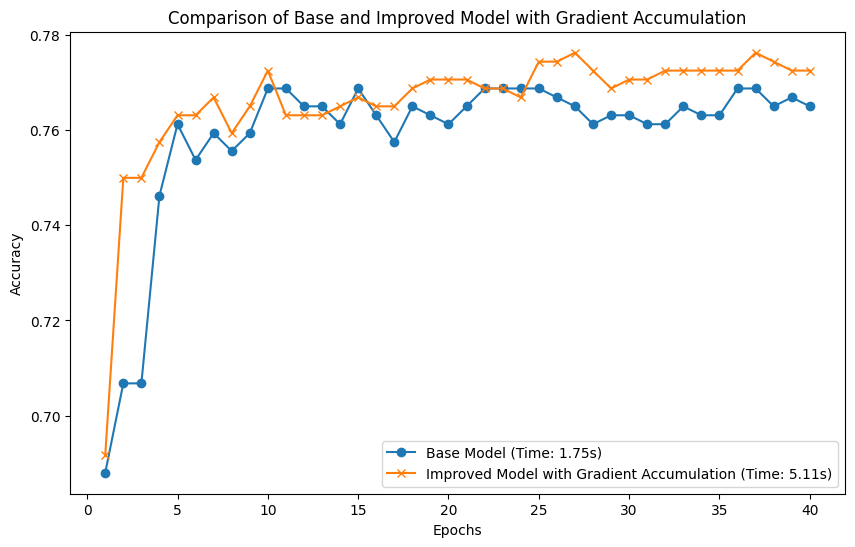

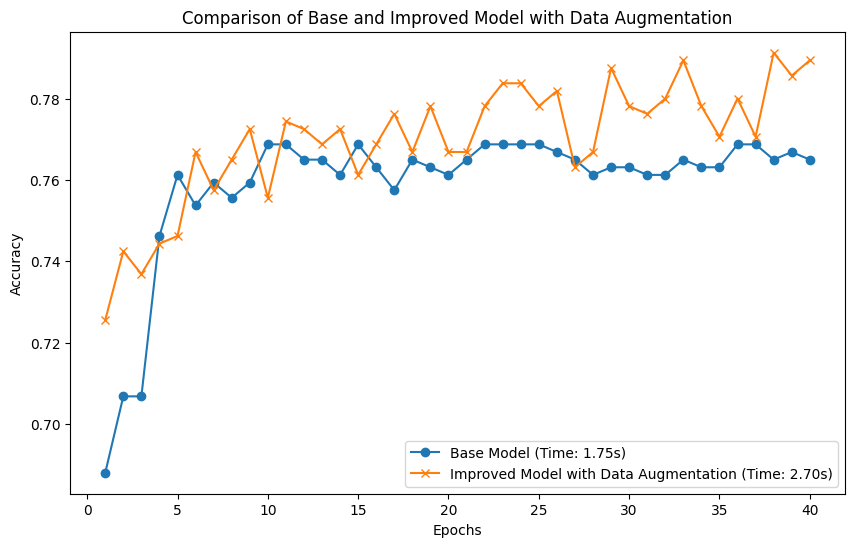

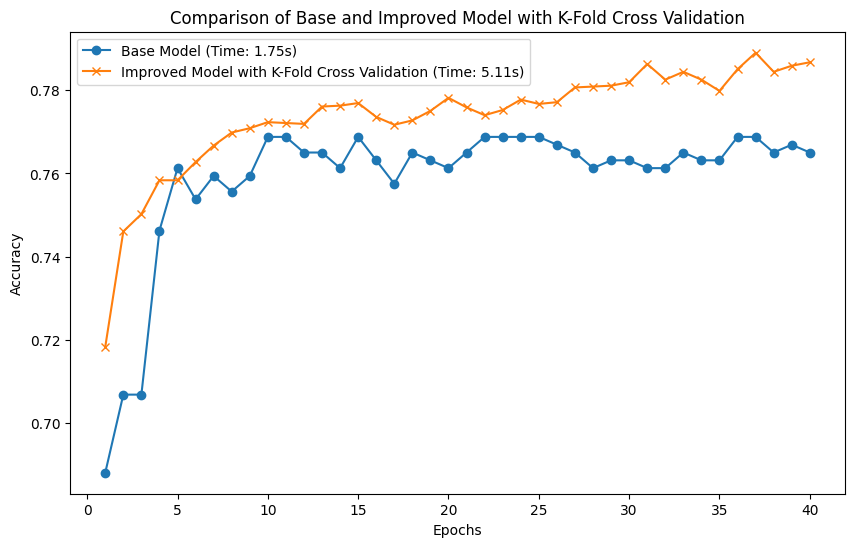

Base Model Final Accuracy: 0.7650
Improved Model with Batch Normalization Final Accuracy: 0.7782
Improved Model with Gradient Accumulation Final Accuracy: 0.7744
Improved Model with Data Augmentation Final Accuracy: 0.7876
Improved Model with K-Fold Final Accuracy: 0.7934


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np



# Define the neural network with batch normalization
class NeuralNetworkWithBN(nn.Module):
    def __init__(self, num_layers, dropout_rate):
        super(NeuralNetworkWithBN, self).__init__()
        self.layers = nn.ModuleList([nn.Linear(7, 256)] +
                                    [nn.Linear(256, 256) for _ in range(num_layers - 1)])
        self.batchnorms = nn.ModuleList([nn.BatchNorm1d(256) for _ in range(num_layers)])
        self.output_layer = nn.Linear(256, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        for layer, bn in zip(self.layers, self.batchnorms):
            x = self.relu(bn(layer(x)))
            x = self.dropout(x)
        x = self.sigmoid(self.output_layer(x))
        return x

# Define a model without batch normalization for gradient accumulation
class NeuralNetworkWithoutBN(nn.Module):
    def __init__(self, num_layers, dropout_rate):
        super(NeuralNetworkWithoutBN, self).__init__()
        self.layers = nn.ModuleList([nn.Linear(7, 256)] +
                                    [nn.Linear(256, 256) for _ in range(num_layers - 1)])
        self.output_layer = nn.Linear(256, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        for layer in self.layers:
            x = self.relu(layer(x))
            x = self.dropout(x)
        x = self.sigmoid(self.output_layer(x))
        return x

# Apply data augmentation by adding noise
def augment_data(X, noise_factor=0.05):  # Reducing noise factor for better results
    noise = torch.randn_like(X) * noise_factor
    return X + noise

# Training function with gradient accumulation and optional batch normalization
def train_model(model, X_train, y_train, learning_rate, batch_size, num_epochs=50, weight_decay=1e-5, use_scheduler=False, accumulation_steps=4):  # Increased accumulation steps
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5) if use_scheduler else None
    train_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train.size()[0])

        for i in range(0, X_train.size()[0], batch_size):
            indices = permutation[i:i + batch_size]
            batch_x, batch_y = X_train[indices], y_train[indices]

            optimizer.zero_grad()
            batch_x = augment_data(batch_x)  # Apply data augmentation

            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()

            if (i // batch_size + 1) % accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()

        if use_scheduler:
            scheduler.step()

        # Calculate accuracy on training data
        model.eval()
        with torch.no_grad():
            train_predictions = model(X_train).round()
            train_accuracy = accuracy_score(y_train, train_predictions)
            train_accuracies.append(train_accuracy)

    return train_accuracies

# Function to measure training time
def measure_time(model, X_train, y_train, learning_rate, batch_size, num_epochs, use_scheduler=False, accumulation_steps=1):
    start_time = time.time()
    accuracies = train_model(model, X_train, y_train, learning_rate, batch_size, num_epochs, use_scheduler, accumulation_steps)
    training_time = time.time() - start_time
    return accuracies, training_time

# K-Fold Cross Validation
def k_fold_cross_validation(model_fn, X_train, y_train, k=4, num_epochs=100):  # Increase number of epochs for better learning
    kf = KFold(n_splits=k)
    avg_epoch_accuracies = np.zeros(num_epochs)

    for train_index, val_index in kf.split(X_train):
        model = model_fn()
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Train on the training fold
        fold_accuracies = train_model(model, X_train_fold, y_train_fold, learning_rate=0.0005, batch_size=16, num_epochs=num_epochs)
        avg_epoch_accuracies += np.array(fold_accuracies)

    avg_epoch_accuracies /= k
    return avg_epoch_accuracies

# Comparison function with truncation
def compare_models(base_accuracies, improved_accuracies, base_time, improved_time, method_name):
    # Truncate accuracies to match shorter length
    min_len = min(len(base_accuracies), len(improved_accuracies))
    base_accuracies = base_accuracies[:min_len]
    improved_accuracies = improved_accuracies[:min_len]

    plt.figure(figsize=(10, 6))
    epochs = range(1, len(base_accuracies) + 1)
    plt.plot(epochs, base_accuracies, label=f"Base Model (Time: {base_time:.2f}s)", marker='o')
    plt.plot(epochs, improved_accuracies, label=f"Improved Model with {method_name} (Time: {improved_time:.2f}s)", marker='x')
    plt.title(f"Comparison of Base and Improved Model with {method_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


# 1. Create and train base model
base_model = NeuralNetworkWithoutBN(num_layers=2, dropout_rate=0.3)  # Increased dropout for base model
base_accuracies, base_time = measure_time(base_model, X_train_tensor, y_train_tensor, learning_rate=0.0005, batch_size=16, num_epochs=40)

# 2. Apply Batch Normalization with reduced dropout
improved_model_bn = NeuralNetworkWithBN(num_layers=2, dropout_rate=0.2)  # Reduced dropout rate
improved_accuracies_bn, improved_time_bn = measure_time(improved_model_bn, X_train_tensor, y_train_tensor, learning_rate=0.0005, batch_size=16, num_epochs=50)

# 3. Apply Gradient Accumulation with higher accumulation steps
improved_model_grad_accum = NeuralNetworkWithoutBN(num_layers=2, dropout_rate=0.2)
improved_accuracies_grad_accum, improved_time_grad_accum = measure_time(improved_model_grad_accum, X_train_tensor, y_train_tensor, learning_rate=0.0005, batch_size=16, num_epochs=100, accumulation_steps=5)

# 4. Apply Data Augmentation with reduced noise factor
improved_model_data_aug = NeuralNetworkWithBN(num_layers=2, dropout_rate=0.2)
improved_accuracies_data_aug, improved_time_data_aug = measure_time(improved_model_data_aug, X_train_tensor, y_train_tensor, learning_rate=0.0005, batch_size=16, num_epochs=50)

# 5. Apply K-Fold with increased epochs
improved_accuracies_kfold = k_fold_cross_validation(lambda: NeuralNetworkWithBN(num_layers=2, dropout_rate=0.2), X_train_tensor, y_train_tensor, k=10, num_epochs=50)

# Compare models with different methods
compare_models(base_accuracies, improved_accuracies_bn, base_time, improved_time_bn, "Batch Normalization")
compare_models(base_accuracies, improved_accuracies_grad_accum, base_time, improved_time_grad_accum, "Gradient Accumulation")
compare_models(base_accuracies, improved_accuracies_data_aug, base_time, improved_time_data_aug, "Data Augmentation")
compare_models(base_accuracies, improved_accuracies_kfold, base_time, improved_time_grad_accum, "K-Fold Cross Validation")

# Print final accuracies for all methods
print(f"Base Model Final Accuracy: {base_accuracies[-1]:.4f}")
print(f"Improved Model with Batch Normalization Final Accuracy: {improved_accuracies_bn[-1]:.4f}")
print(f"Improved Model with Gradient Accumulation Final Accuracy: {improved_accuracies_grad_accum[-1]:.4f}")
print(f"Improved Model with Data Augmentation Final Accuracy: {improved_accuracies_data_aug[-1]:.4f}")
print(f"Improved Model with K-Fold Final Accuracy: {improved_accuracies_kfold[-1]:.4f}")


In [33]:
def save_best_model(model, filename):
    torch.save(model.state_dict(), filename)
    print(f"Best model saved as {filename}")


# Calculate final accuracies for all models
base_final_accuracy = base_accuracies[-1]
improved_bn_final_accuracy = improved_accuracies_bn[-1]
improved_grad_accum_final_accuracy = improved_accuracies_grad_accum[-1]
improved_data_aug_final_accuracy = improved_accuracies_data_aug[-1]
improved_kfold_final_accuracy = improved_accuracies_kfold[-1]

# Compare the accuracies
final_accuracies = {
    "Base Model": base_final_accuracy,
    "Batch Normalization": improved_bn_final_accuracy,
    "Gradient Accumulation": improved_grad_accum_final_accuracy,
    "Data Augmentation": improved_data_aug_final_accuracy,
    "K-Fold Cross Validation": improved_kfold_final_accuracy
}

# Find the model with the highest accuracy
best_method = max(final_accuracies, key=final_accuracies.get)
best_accuracy = final_accuracies[best_method]

# Output the best model and accuracy
print(f"Best Model: {best_method} with accuracy of {best_accuracy:.4f}")

# Save the model with the highest accuracy
if best_method == "Base Model":
    save_best_model(base_model, "best_model_base.pth")
elif best_method == "Batch Normalization":
    save_best_model(improved_model_bn, "best_model_bn.pth")
elif best_method == "Gradient Accumulation":
    save_best_model(improved_model_grad_accum, "best_model_grad_accum.pth")
elif best_method == "Data Augmentation":
    save_best_model(improved_model_data_aug, "best_model_data_aug.pth")
elif best_method == "K-Fold Cross Validation":
   save_best_model(improved_model_data_aug, "best_model_kfold.pth")



Best Model: K-Fold Cross Validation with accuracy of 0.7934
Best model saved as best_model_kfold.pth


#Step 5

In [34]:
import torch
import torch.nn as nn
from sklearn.metrics import precision_recall_fscore_support
import numpy as np


# Function to evaluate the K-Fold model on the test data
def evaluate_kfold_model(saved_model_path, model_fn, X_test_tensor, y_test_tensor):
    # Initialize the model
    model = model_fn()

    # Load the saved weights
    model.load_state_dict(torch.load(saved_model_path))

    # Set the model to evaluation mode
    model.eval()

    # Define the loss function (BCELoss used in training)
    criterion = nn.BCELoss()

    # No gradients needed for testing
    with torch.no_grad():
        test_outputs = model(X_test_tensor)

        # Calculate the loss
        loss = criterion(test_outputs, y_test_tensor)
        print(f"Test Loss: {loss.item():.4f}")
        # Convert sigmoid outputs to 0 or 1
        predicted_labels = torch.round(test_outputs)

        # Calculate accuracy
        accuracy = (predicted_labels == y_test_tensor).sum().item() / len(y_test_tensor)
        print(f"Test Accuracy: {accuracy * 100:.2f}%")

        # Convert tensors to numpy arrays for precision, recall, and F1 score calculation
        y_true = y_test_tensor.numpy()
        y_pred = predicted_labels.numpy()

        # Calculate precision, recall, and F1 score
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

# Path to the saved model weights
saved_model_path = "best_model_kfold.pth"


# Evaluate the K-Fold model on the test data and print testing loss
evaluate_kfold_model(saved_model_path, lambda: NeuralNetworkWithBN(num_layers=2, dropout_rate=0.2), X_test_tensor, y_test_tensor)


Test Loss: 0.4150
Test Accuracy: 83.55%
Precision: 0.74, Recall: 0.70, F1 Score: 0.72


<ipython-input-34-97b189e8513f>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(saved_model_path))


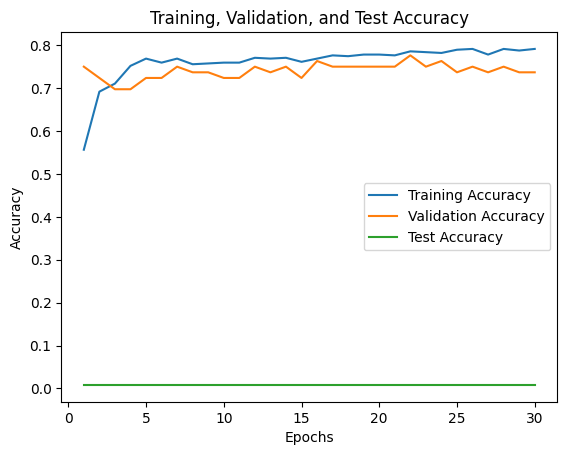

In [35]:
# Create a list of the same test accuracy repeated for the number of epochs
test_accuracy = accuracy / 100  # Convert to decimal
test_accuracies = [test_accuracy] * epochs  # Same value for each epoch

# Plot training, validation, and test accuracy
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()

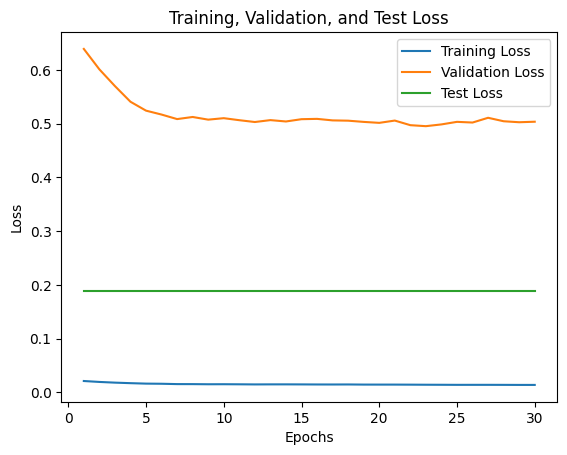

In [36]:
# Replace with the actual test loss if available
test_loss =loss.item() # This is from your output; replace if necessary
test_losses = [test_loss] * epochs  # Same value for each epoch

# Plot training, validation, and test loss
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()


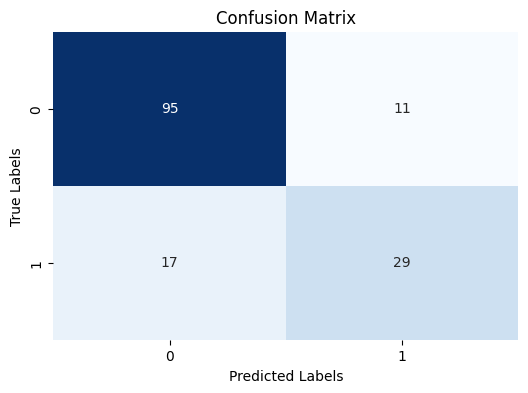

In [37]:
# Make predictions on the test set
from sklearn.metrics import confusion_matrix
model.eval()  # Set the model to evaluation mode for testing

with torch.no_grad():  # No gradients needed during testing
    test_outputs = model(X_test_tensor)

    # Apply sigmoid and round the outputs to get binary predictions (0 or 1)
    predicted_labels = torch.round(test_outputs)

# Compute confusion matrix
y_true = y_test_tensor.numpy()  # Convert ground truth labels to numpy
y_pred = predicted_labels.numpy()  # Convert predicted labels to numpy

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


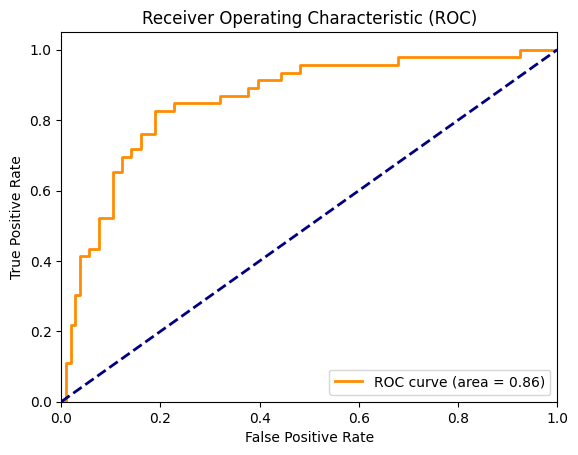

In [38]:
from sklearn.metrics import roc_curve, auc

# Get the raw outputs from the model (before rounding)
with torch.no_grad():
    test_outputs = model(X_test_tensor)

# Convert tensors to numpy for ROC curve calculation
y_test_np = y_test_tensor.numpy()  # Ground truth labels
test_outputs_np = test_outputs.numpy()  # Model output probabilities

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_np, test_outputs_np)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
